<b><span style="color:#00008b;font-family:verdana;font-size:18px"> CONTEXTO </span></b>

Trabajamos como científicos de datos para una empresa de retail que, debido al cambio en los hábitos de consumo de los clientes, está potenciando ampliamente el servicio de venta online. La empresa quiere realizar un modelo de aprendizaje automático para clasificar a los clientes en función de la probabilidad de generar ingresos al comprar en la web.

El objetivo es realizar una serie de acciones específicas para los clientes que es más probable que hagan compras en la web.

<b><span style="color:#00008b;font-family:verdana;font-size:18px"> INFORMACIÓN SOBRE LOS DATOS </span></b>

1. El conjunto de datos consta de diez atributos numéricos y ocho categóricos.
2. El atributo revenue puede ser usado como la etiqueta de la clase.
3. Administrative, administrative duration, informational, informational duration, product related y product related duration representan el número de diferentes tipos de páginas visitadas por el visitante en esa sesión y el tiempo total dedicado a cada una de estas categorías de páginas. Los valores de estas características se derivan de la información del URL de las páginas visitadas por el usuario y se actualizan en tiempo real cuando el usuario realiza una acción, por ejemplo, pasar de una página a otra.
4. Las características bounce rate, exit rate y page value representan las métricas medidas por Google Analytics para cada página del sitio de comercio electrónico.
El valor de la característica bounce rate de una página web se refiere al porcentaje de visitantes que entran en el sitio desde esa página y luego salen (rebote) sin activar ninguna otra solicitud al servidor de análisis durante esa sesión.
El valor de la característica exit rate para una página web específica se calcula como para todas las visitas a la página, el porcentaje que fueron las últimas en la sesión.
La función Page Value representa el valor medio de una página web que un usuario ha visitado antes de completar una transacción de comercio electrónico.
5. La característica de special day indica la cercanía de la hora de visita del sitio a un día especial específico (por ejemplo, el Día de la Madre, San Valentín) en el que es más probable que las sesiones finalicen con una transacción.
El valor de este atributo se determina teniendo en cuenta la dinámica del comercio electrónico, como la duración entre la fecha del pedido y la fecha de entrega.
Por ejemplo, para San Valentín, este valor toma un valor distinto de 0 entre el 2 y el 12 de febrero, 0 antes y después de esta fecha a menos que esté cerca de otro día especial, y su valor máximo de 1 el 8 de febrero.
6. El conjunto de datos también incluye el sistema operativo, el navegador, la región, el tipo de tráfico, el tipo de visitante como visitante que regresa o como nuevo visitante, un valor booleano que indica si la fecha de la visita es de fin de semana, y el mes del año.

<b><span style="color:#00008b;font-family:verdana;font-size:18px"> REQUERIMIENTOS </span></b>

Se pide:

* Realización de un análisis de las variables del dataset de Google Analytics como pueden ser histogramas, boxplots, etc. Cualquier otro análisis es bienvenido, siempre explicándolo y con un sentido de negocio.
* Tratamiento de los valores faltantes, outliers, etc., en caso de que los hubiese. Si hay valores con missings, habrá que eliminarlos con el método de Pandas llamado Dropna().a.
* Tratamiento de categóricas, pasándolas a numéricas por medio de dummies, mapeándolas o utilizando un label encoder. Hay que justificar las operaciones que se realizan.
* Si existe alguna variable que se necesite borrar, habrá que borrara y justificarlo.
* Estandariza los datos.
* Dividir los datos en train y en test. Con los datos de train se pretende ajustar modelos con CrossValidation y GridSearch.

    - Utilizar un modelo lineal. Entre los modelos lineales están las regresiones logísticas, las regresiones lineales, etc.
    - Utilizar un modelo de redes neuronales.
    - Utilizar cualquier otro modelo de clasificación.
* Optimizar algún parámetro de cada modelo utilizando CrossValidation y GridSearch, o de la forma que se estime oportuna, siempre justificándolo.
* Elegir el mejor modelo de los tres según la métrica ROC en CrossValidation. Predecir Test y obtener una métrica estimada.
* Umbralizar las probabilidades utilizando el umbral que maximice el área bajo la curva ROC.

El entregable final será un Jupyter Notebook en el que se realicen todos los análisis y los modelos.

--------------------------------------------------------------------------------------------------------------------

<b><span style="color:#00bfff;font-family:verdana;font-size:18px"> Ratio de Exploración EPSILON: </span></b>

<span style="color:#00bfff;font-family:verdana;font-size:18px"> 1.1 PRE - PROCESSING DE LA INFORMACIÓN </span>

En esta etapa del entregable, el objetivo será el entendimiento de las variables que vamos a utilizar para la construcción de los modelos, así como su tratamiento previo para garantizar que éstos se ejecutan con el mayor nivel de calidad posible.

Para ello, empezaremos con el análisis exploratorio mediante métodos y gráficos.

In [1]:
# Comenzamos importando las librerías que utilizaremos durante el preprocesamiento

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats

warnings.filterwarnings("ignore")

In [2]:
# Posteriormente, importamos el dataset que utilizaremos para la construcción de nuestros modelos

dataset = pd.read_csv(
    r"E:\Mi\Documentos\Formacion\MASTER DATA SCIENCE\01_Master Data Science y Business Analytics\01.6 Aprendizaje automático\08. Evaluación final\online_shoppers_intention.csv"
)

In [3]:
# A continuación, entenderemos la dimensión de nuestro dataset al que nos enfrentamos

print(f"El número de registros (eje x) del dataset es {dataset.shape[0]}")
print(f"El número de variables (eje y) del dataset es {dataset.shape[1]}")

El número de registros (eje x) del dataset es 12330
El número de variables (eje y) del dataset es 18


Nos encontramos ante un dataset de 12330 x 18

In [4]:
# Posteriormente, identificaremos qué tipos de variables contiene nuestro dataset, de cara a hacer los posteriores cálculos

dataset.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

La variable objetivo (Revenue) es de tipo booleano, por lo tanto los problemas a los que nos enfrentaremos después serán **de aprendizaje supervisado** y **de clasificación**

Adicionalmente, podemos observar que las 4 variables reflejadas como "integer", realmente el ejercicio las considera como categóricas, por lo que deberemos modificarles la tipología de cara a que todo el ejercicio posterior se desarrolle correctamente

In [5]:
# Convertimos las 4 variables de integer a string (object)

for col in dataset.columns:
    if dataset[col].dtypes == "int64":
        dataset[col] = dataset[col].astype(str)
    else:
        pass

Adicionalmente, y de cara a homogeneizar y facilitar la lectura de las conclusiones, renombraremos los valores de las variables "Weekend" (Weekend / Not weekend) y "Revenue" (Profitable / Non - profitable)

In [6]:
# Empezamos con la columna de "Weekend"

dataset["Weekend"] = dataset["Weekend"].replace(
    [True, False], ["Weekend", "Not weekend"]
)

# Y seguimos con la columna de "Revenue"

dataset["Revenue"] = dataset["Revenue"].replace(
    [True, False], ["Profitable", "Not profitable"]
)

In [7]:
# Utilizamos el método "head" para comprobar que ambos cambios se han aplicado correctamente

dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,Not weekend,Not profitable
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,Not weekend,Not profitable
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,Not weekend,Not profitable
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,Not weekend,Not profitable
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,Weekend,Not profitable


Una vez realizados estos pasos, comprobaremos en último lugar cuáles son los valores únicos que nos ofrecen las variables categóricas, de cara a garantizar que podemos comenzar con el análisis.

In [8]:
for col in dataset.columns:
    if dataset[col].dtypes == "object":
        print(f"Col: {col} , Unique values: {dataset[col].unique()}")
    else:
        pass

Col: Month , Unique values: ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
Col: OperatingSystems , Unique values: ['1' '2' '4' '3' '7' '6' '8' '5']
Col: Browser , Unique values: ['1' '2' '3' '4' '5' '6' '7' '10' '8' '9' '12' '13' '11']
Col: Region , Unique values: ['1' '9' '2' '3' '4' '5' '6' '7' '8']
Col: TrafficType , Unique values: ['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '18'
 '19' '16' '17' '20']
Col: VisitorType , Unique values: ['Returning_Visitor' 'New_Visitor' 'Other']
Col: Weekend , Unique values: ['Not weekend' 'Weekend']
Col: Revenue , Unique values: ['Not profitable' 'Profitable']


De cara a realizar el ejercicio lo mejor posible, sería muy bueno tener un descriptivo de lo que significa cada variable cualitativa (por ejemplo, qué es traffic type 1, 2...). Dado que en este caso no contamos con ello, el análisis continúa su curso

In [9]:
# Acto seguido, sacamos por pantalla el summary del dataframe, de cara recibir una visión general de la información tratada

dataset.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


Mediante el método "describe", obtenemos el resumen de la información cuantitativa.

De esta información, podemos ya sacar algunas preconclusiones resaltables:

* Las páginas más visitadas son las relacionadas con el producto, con una media de 31,8 páginas por sesión y 1.196 segundos de media en ellas.
* Por lo general, el set de clientes actual de la empresa:
    - Tiene un *page value* bastante bajo, es decir, gasta poco en comparación con las veces que entra a visitar la página.
    - Tiende más a visitar la página que a abandonarla sin revisar nada (bounce rate > exit rate)
  
En general, ambos puntos nos hacen preconcluir que el problema que tiene esta empresa es que tiene una gran capacidad de llegada a sus clientes a través de la web, pero no consigue materializarlo en compras de alto valor por algún motivo que desconocemos.

Lo siguiente que haremos será preguntarle al dataset si existe algún tipo de valor duplicado. Considerando que sería MUY raro que un cliente tuviera exactamente los mismos valores, debemos cerciorarnos de que no existen de cara a garantizar un buen análisis

In [10]:
# Utilizaremos para ello el método duplicate

print(f"El número de filas duplicadas en el dataset es {dataset.duplicated().sum()}")

El número de filas duplicadas en el dataset es 119


Podemos observar que hay 119 filas del dataframe que son exactamente iguales. Dado que esta es una circunstancia extraña, y que el número de registros del que disponemos es grande, los eliminaremos del dataset con el objetivo de no pervertir el análisis posterior.

In [11]:
# Dropeamos del dataset los valores duplicados

dataset = dataset.drop_duplicates()

# Y garantizamos que los cambios se han realizado correctamente

print(
    f"Tras el cambio, el número de registros incorporados en el dataset es {dataset.shape[0]}"
)

Tras el cambio, el número de registros incorporados en el dataset es 12211


Lo siguiente que haremos será investigar acerca de los valores nulos existentes en cada columna, dado que también podrán dar lugar a conclusiones erróneas en nuestro análisis.

In [12]:
# En primer lugar, realizamos el conteo de valores nulos para cada una de las columnas:

dataset.isna().sum()

Administrative             12
Administrative_Duration    12
Informational              12
Informational_Duration     12
ProductRelated             12
ProductRelated_Duration    12
BounceRates                12
ExitRates                  12
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [13]:
# Dado que hay 12 filas con valores nulos sobre el total de 12211, no cabe pensar que eliminarlas del dataset vaya a influir en nuestro análisis.
# Por ello, pasamos a dropearlas también

dataset = dataset.dropna()

# Y también garantizamos que el cambio se ha realizado correctamente

print(
    f"Tras el cambio, el número de registros incorporados en el dataset es {dataset.shape[0]}"
)

Tras el cambio, el número de registros incorporados en el dataset es 12199


<span style="color:#00bfff;font-family:verdana;font-size:18px"> 1.2 ANÁLISIS EXPLORATORIO </span>

Una vez realizada esta primera parte del preprocesamiento, empezaremos a graficar el dataset para entender mejor características adicionales de las variables, y cómo estas se encuentran interrelacionadas.
Este paso nos resultará muy últil de cara a posteriores pasos del ejercicio. Este análisis lo dividiremos  en dos etapas:

* Análisis univariante: Graficaremos y obtendremos las conclusiones acerca de las variables por separado.
* Análisis multivariante: Graficaremos las correlaciones entre las variables

Con todo ello, nuestros principales objetivos serán:

1. Entender el dataset más en profundidad
2. Limpiar el dataset de variables que no aportan valor y que pueden entorpecer el análisis.

Empecemos con el análisis univariante:

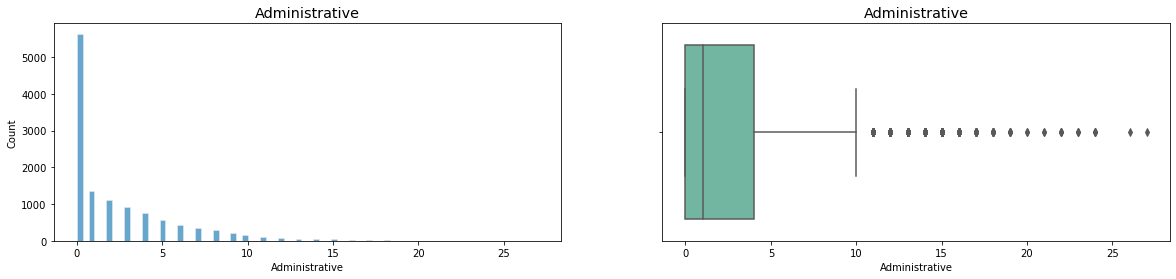

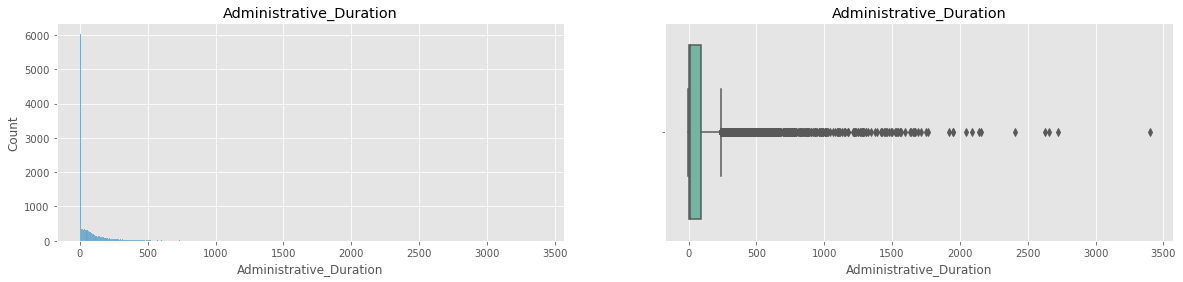

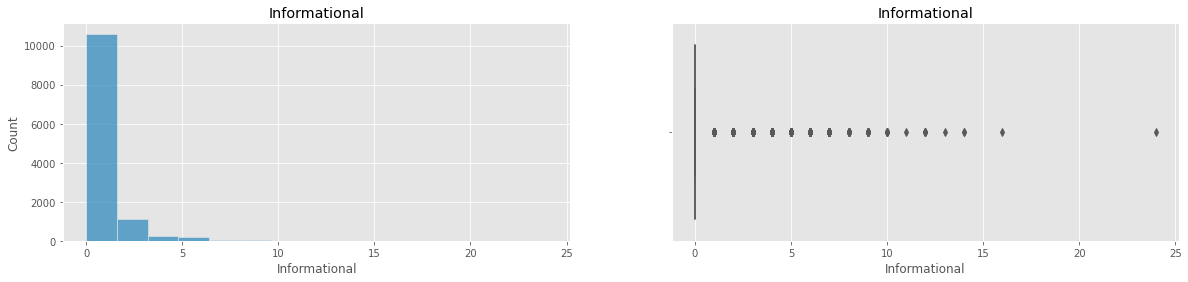

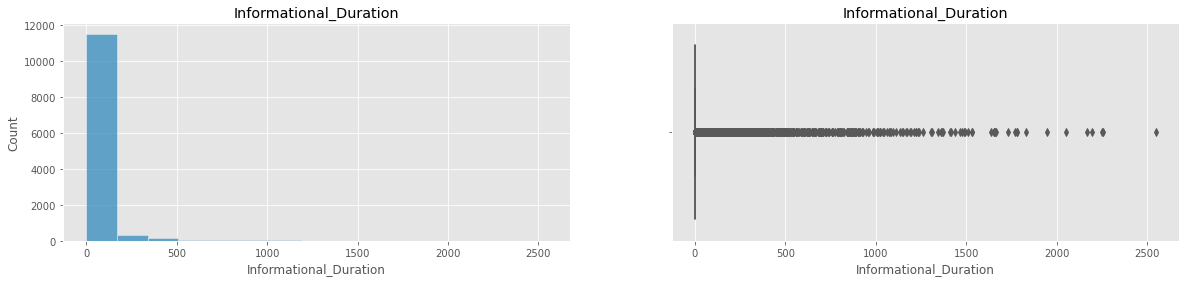

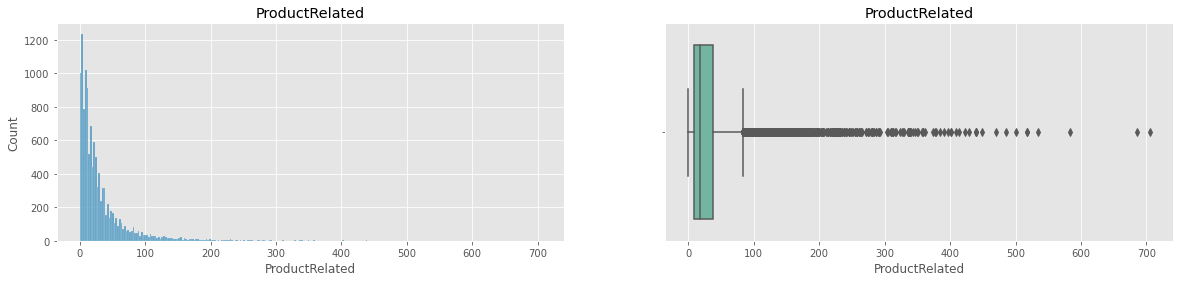

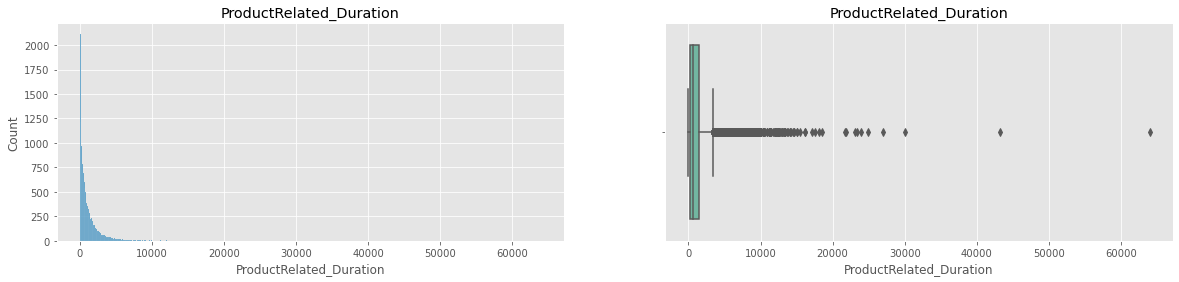

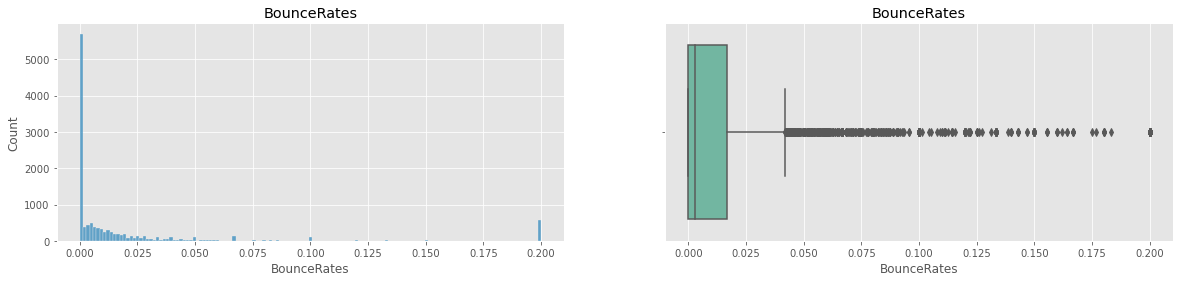

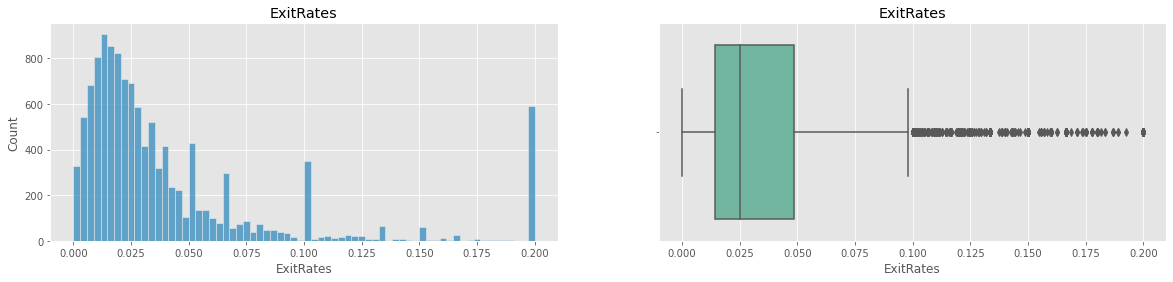

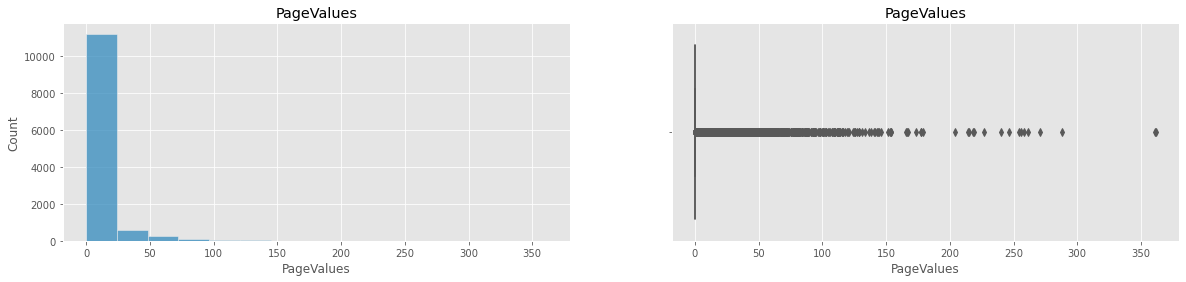

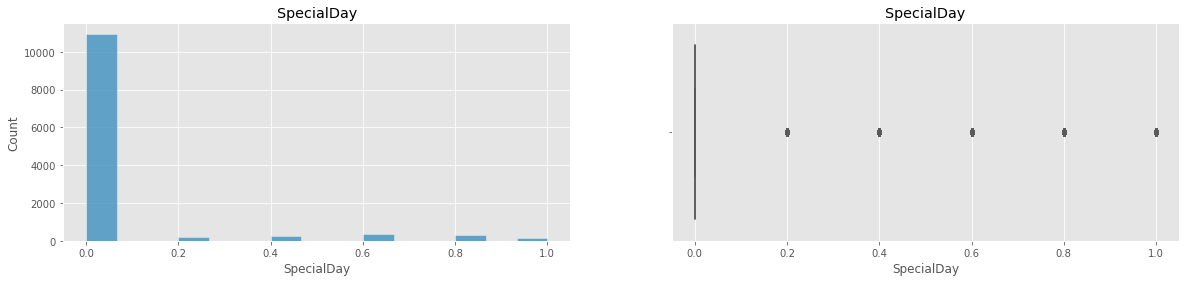

In [14]:
# En primer lugar, graficaremos mediante histogramas las variables cuantitativas.

numerical = dataset.select_dtypes("number").columns

for col in numerical:
    # Primero definimos el tamaño de los subplots...
    fig, ax = plt.subplots(1, 2, figsize=(20, 4))
    plt.style.use("ggplot")

    # Y posteriormente generamos tanto su histograma como su box chart
    sns.histplot(data=dataset, x=col, palette="Set2", ax=ax[0]).set(title=col)
    sns.boxplot(data=dataset, x=col, palette="Set2", ax=ax[1]).set(title=col)

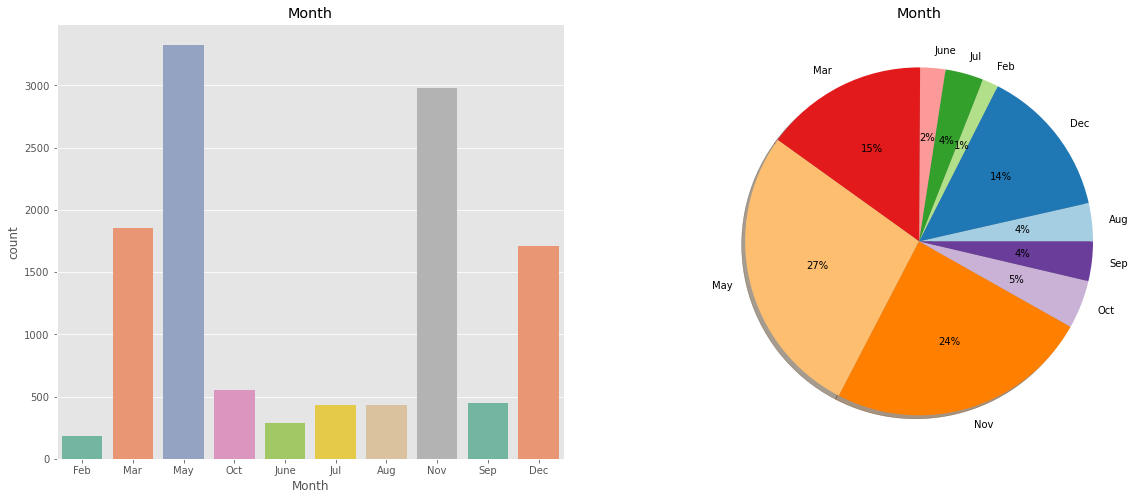

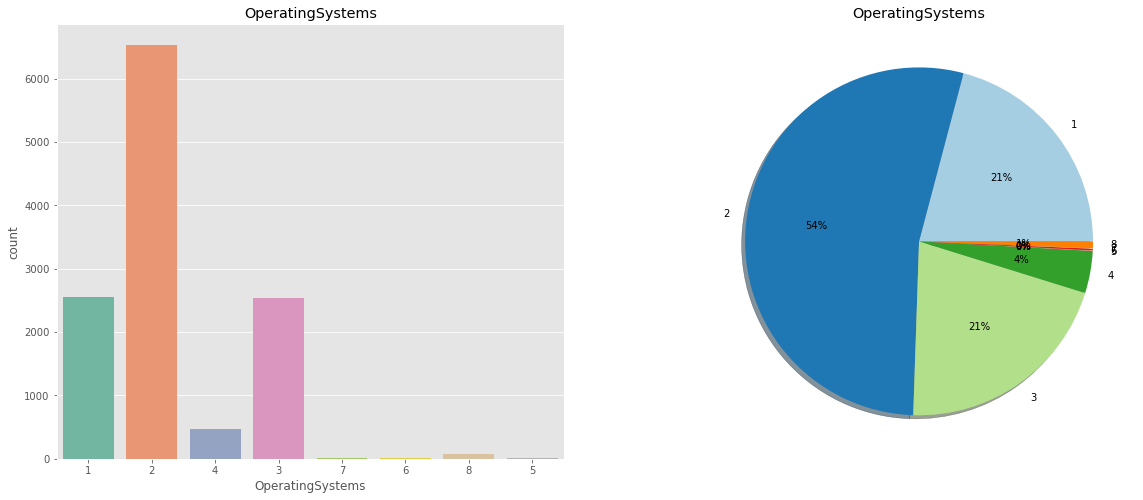

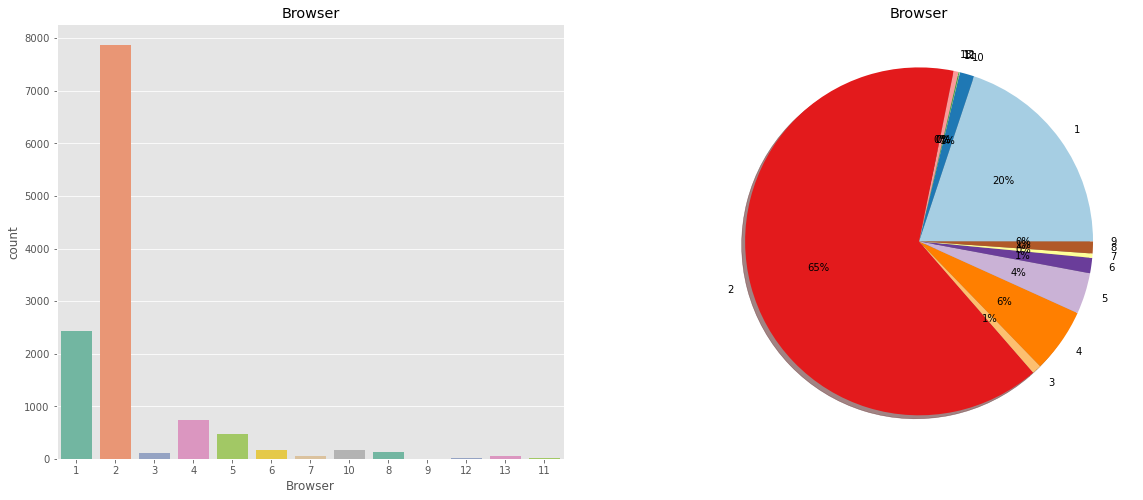

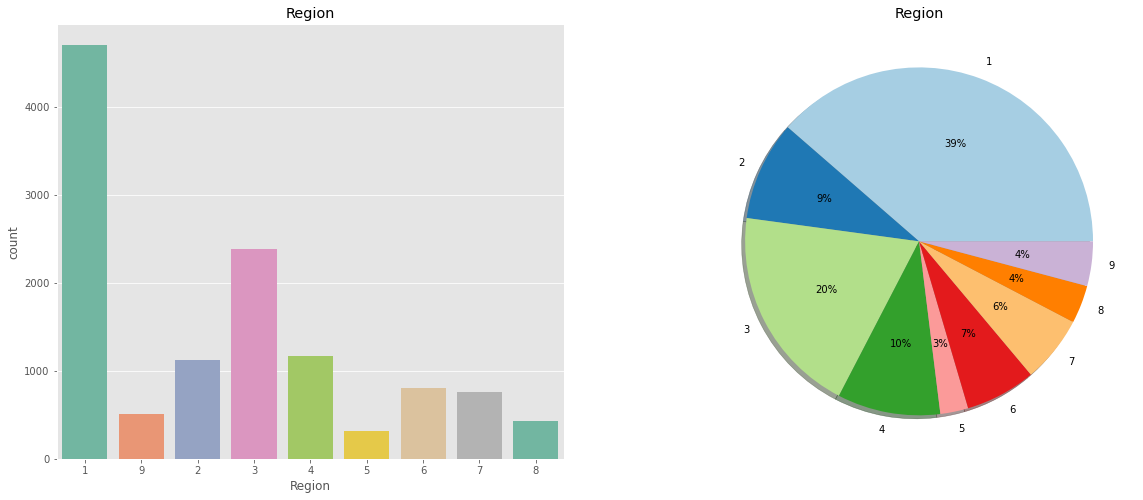

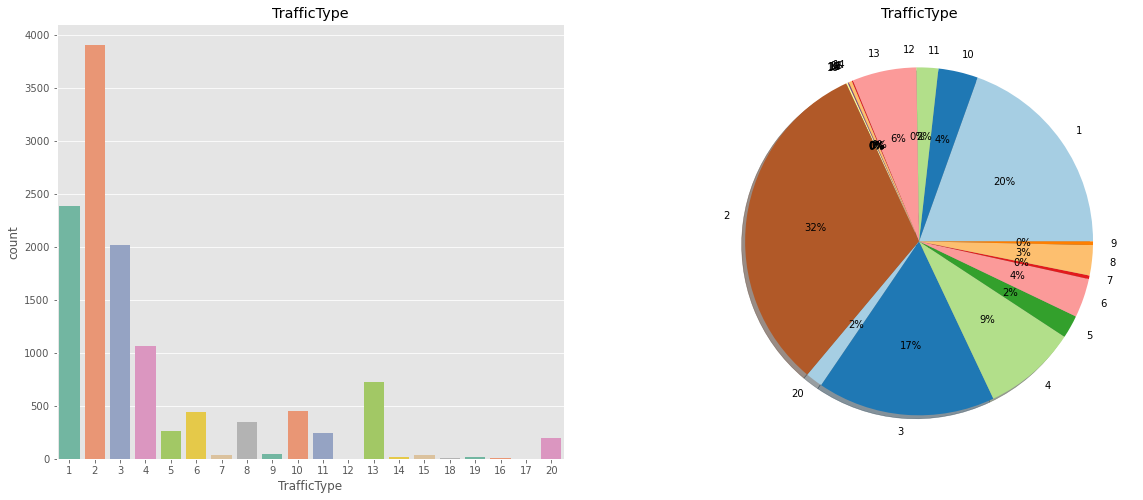

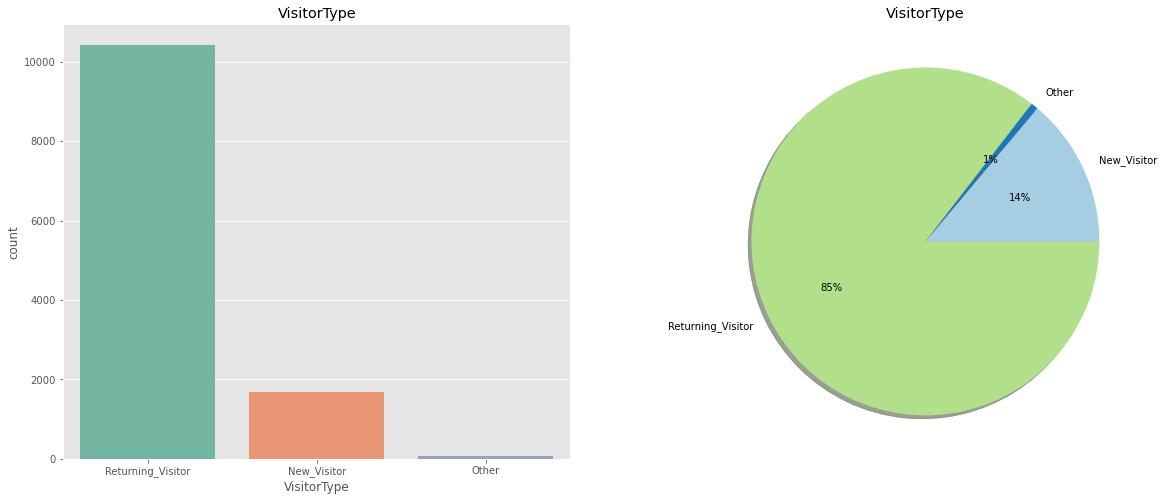

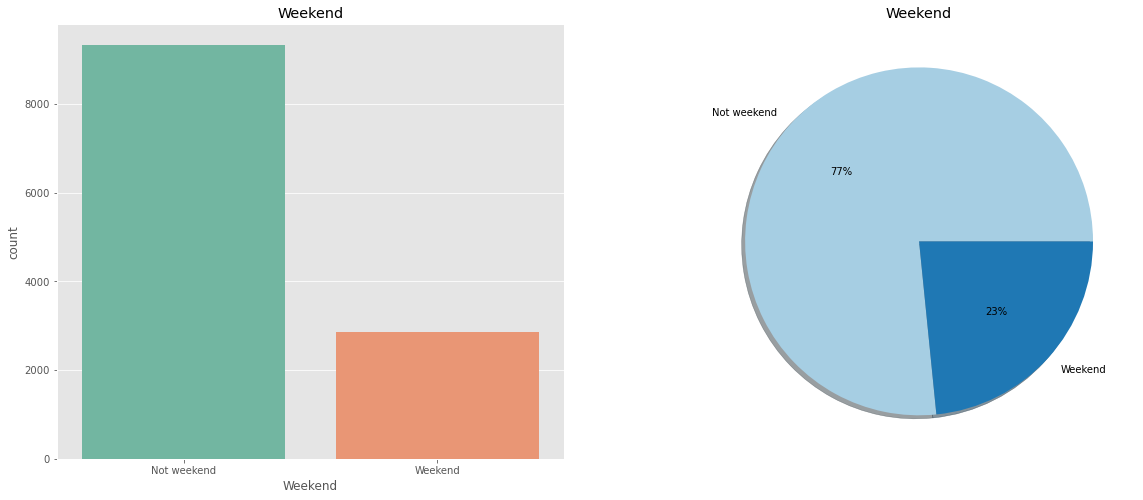

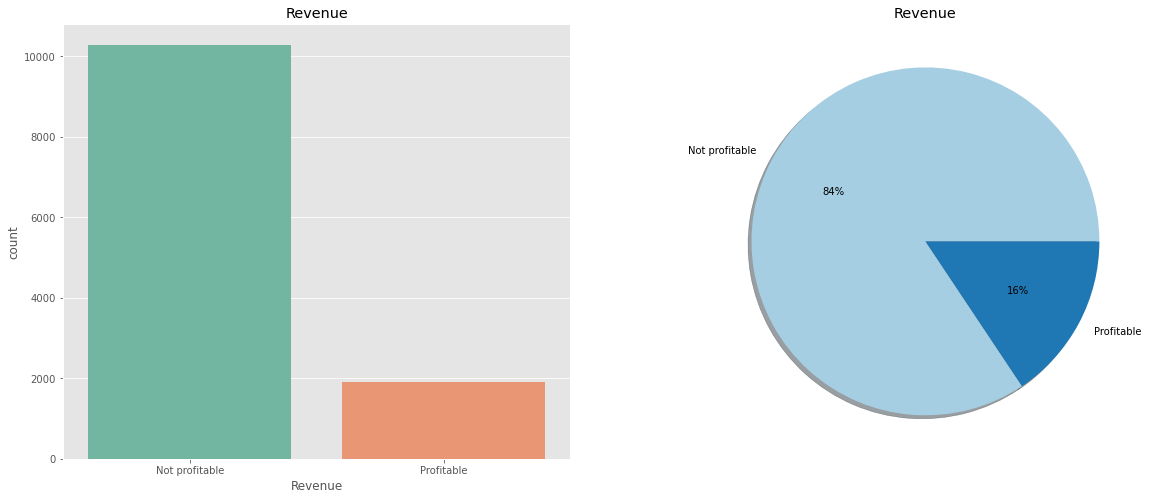

In [15]:
# Para continuar, continuamos graficando las variables cualitativas

categorical = dataset.select_dtypes("object").columns

for col in categorical:

    # De nuevo, definimos el tamaño de los subplots...
    fig, ax = plt.subplots(1, 2, figsize=(20, 8))
    plt.style.use("ggplot")

    # Y posteriormente definimos los gráficos. En este caso, tendremos que tener en cuenta que el pie chart necesitará estar agrupado por concepto para representarse correctamente
    sns.countplot(col, data=dataset, palette="Set2", ax=ax[0]).set(title=col)

    grouped_dataset = dataset.groupby(col).count()
    pie_data = list(grouped_dataset.iloc[:, 0])
    labels = list(grouped_dataset.index)
    plt.pie(
        pie_data,
        labels=labels,
        colors=sns.color_palette("Paired"),
        shadow=True,
        autopct="%.0f%%",
    )
    plt.title(col)

Una vez realizado este primer análisis univariante, podemos extraer las siguientes conclusiones:

<b><span style="color:#F10654;font-family:verdana;font-size:14px"> ANÁLISIS CUANTITATIVO </span></b>

* Por lo general, todas las variables se distribuyen de forma semejante a una distribución normal desplazada hacia la izquierda. El motivo de esto lo encontramos en los "boxplots" dibujados a la derecha, que nos hacen ver que se trata de un dataset con bastantes valores outliers. Esta circunstancia deberemos tenerla muy en cuenta de cara a elegir correctamente el modelo de predicción a utilizar, así como los parámetros.
* Enfocándonos más en el problema que queremos resolver, podemos identificar que esta empresa de retail tiene un "page value" considerablemente bajo (notable diferencia entre la primera barra del histograma y el resto).
* Adicionalmente, podemos observar que la media de los ratios "bounce" y "exit" es **considerablemente baja**. Esta circunstancia, aglutinada junto con el punto anterior nos lleva a pensar que nos encontramos ante el siguiente problema:
"El cliente se queda mucho tiempo en mi página web pero finalmente no compra demasiado"

<b><span style="color:#F10654;font-family:verdana;font-size:14px"> ANÁLISIS CUALITATIVO </span></b>

* En lo que respecta a los visitantes, podemos observar que el 85% de éstos pertenecen al grupo de "existing visitors". Esto podría llevarnos a pensar dos cosas:
    - La empresa tiene el suficiente posicionamiento en de marca como para que no mucha gente nueva entre a visitar la página (considerando el resto de información sobre la empresa, poco probable)
    - La estrategia de marketing digital seguida por esta empresa durante los últimos años ha dado poco resultado en términos de captación de nuevos visitantes.
* Otro punto importante a destacar es que el 23% de las visitas a la página se realizan en fin de semana. Sólo el 23. Por lo general, las personas tendemos a tener tiempo libre para mirar ropa nueva, muebles, u otros artículos en fin de semana, que es cuando disponemos de más tiempo. El hecho de que haya tanto % de visitas entre semana nos hace pensar que el negocio puede estar centrado en artículos de primera necesidad (eso explicaría un page value tan bajo: "Compro y me salgo de la página").
* Por último, cabe destacar que el 84% de los clientes no son profitables. EL 84%!!!!! Sin duda, esto deja ver que la empresa se centra sobre todo en un elevado volumen de ventas muy diversificado en términos de clientes.
* Respecto a las otras 3 variables cualitativas, cuesta encontrar asociaciones potenciales entre ellas y la variable de "profitability". No obstante, las mantendremos por el momento en el dataframe hasta realizar el análisis multivariante.

Continuamos con el análisis multivariante:

Lo primero que haremos será analizar la correlación existente de cada una de nuestras variables con la variable que pretendemos explicar ("Revenue"). Este análisis lo dividiremos en dos partes:

* Variables cuantitativas vs "Revenue": Aplicaremos el test ANOVA para identificar si existen diferencias significativas en la varianza de nuestras variables explicativas en función de la categoría "Revenue".
* Variables cualiativas vs "Revenue": Aplicaremos el chi test para identificar si existe relación entre nuestras variables, o, sin embargo, hay alguna que podamos eliminar.


In [16]:
# Empezando con las variables cuantitativas, haremos uso del ANOVA test
# Nuestra hipótesis nula en el test será que las variables NO están correlacionadas.

anova_results = {}

for col in numerical:
    CategoryGroupLists = dataset.groupby("Revenue")[col].apply(
        list
    )  # Dividimos la información del dataset en dos listas, una para cada categoría (profitable / non profitable)
    Resultado_Anova = stats.f_oneway(*CategoryGroupLists)
    anova_results[col] = Resultado_Anova[1]

In [17]:
# Una vez realizado el loop, le preguntamos al diccionario si hay alguna variable con un p-valor superior a 0,05.

contador = 0

for key, value in anova_results.items():
    if value < 0.05:
        pass
    else:
        contador += 1
        print(
            f"La variable {key} es independiente, con un p-valor en el test ANOVA de {value}"
        )

if contador == 0:
    print(
        "Todas las variables cuantitativas están correlacionadas con la variable Revenue"
    )

Todas las variables cuantitativas están correlacionadas con la variable Revenue


Como podemos observar, el resultado nos arroja que todas las variables cuantitativas están correlacionada con la variable "Revenue". Esto quiere decir que hay diferencias significativas entre la varianza de las diferentes variables en función de la categoría. Veamos ahora esto gráficamente a través de Boxplots.

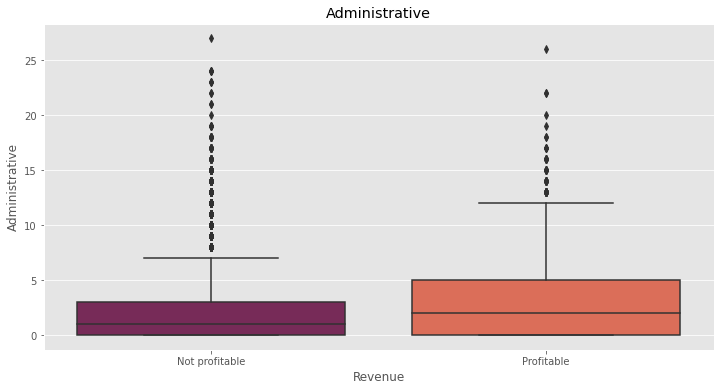

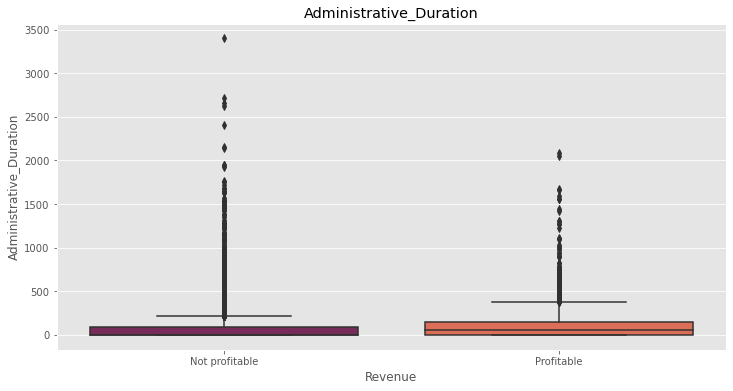

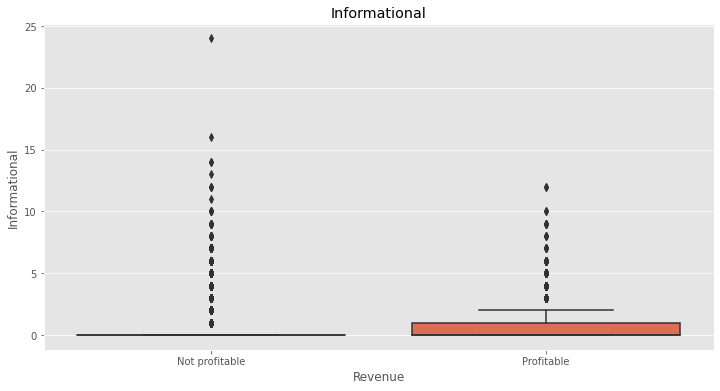

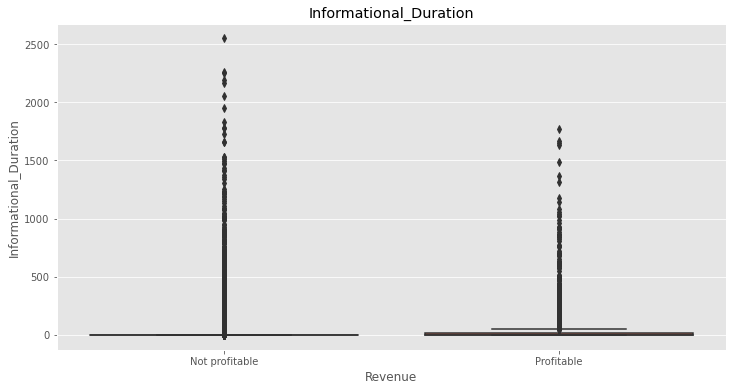

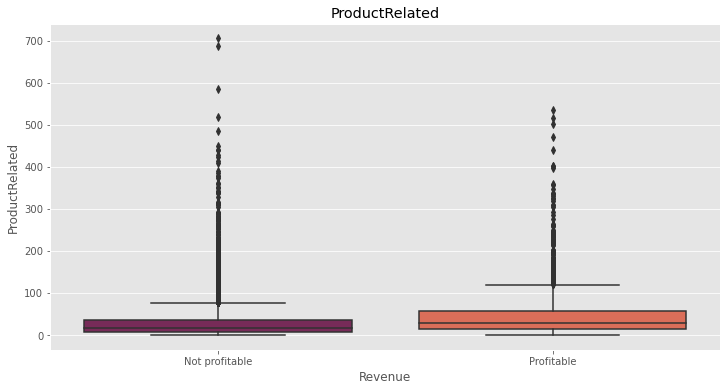

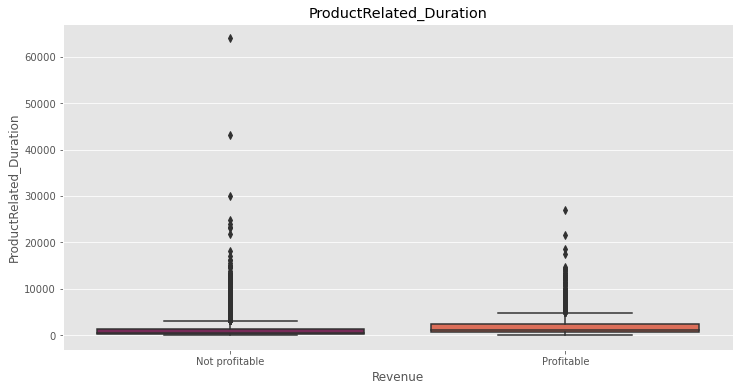

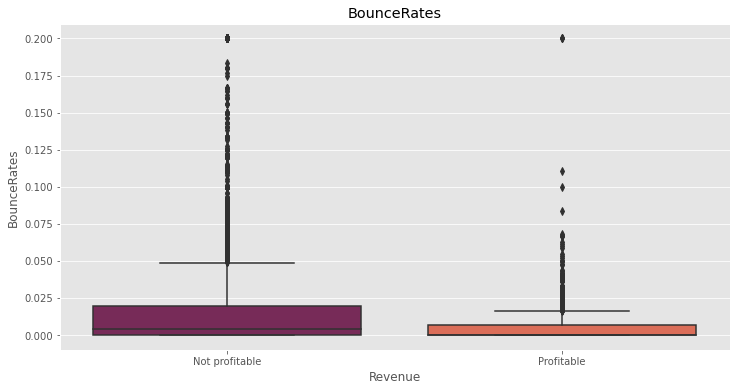

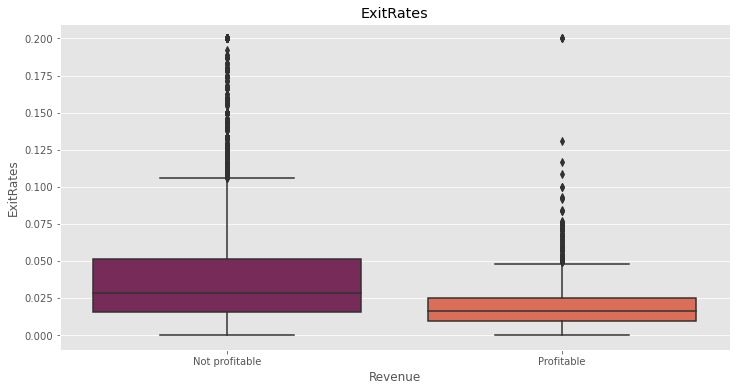

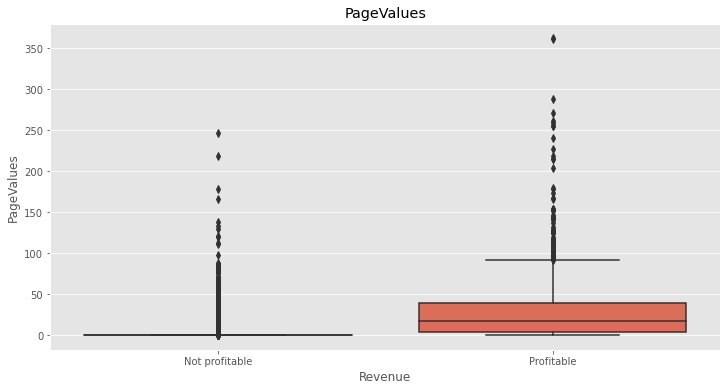

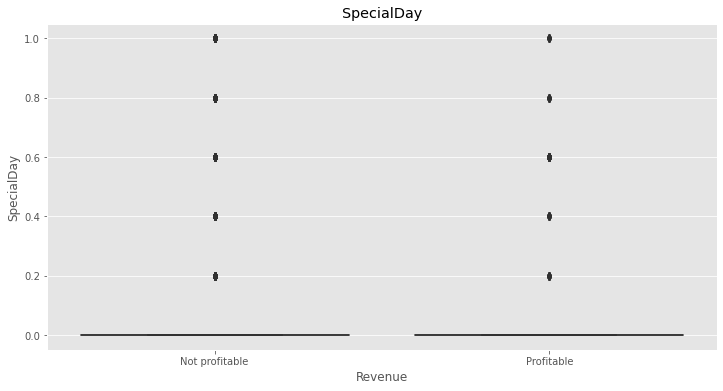

In [18]:
for col in numerical:
    sns.boxplot(x=dataset["Revenue"], y=dataset[col], palette="rocket").set(title=col)
    plt.gcf().set_size_inches(12, 6)
    plt.style.use("ggplot")
    plt.show()

Tal y como nos indicaba el test ANOVA, las diferencias en la varianza de las variables en función de su categoría es más que notoria, dadas las diferencias que existen en el spread de las cajas

Pasaremos ahora al análisis de la parte cualitativa, que abordaremos a través de la ejecución del chi test

In [19]:
# Acto seguido, y de la misma manera que hemos hecho antes, iremos calculando a través de un bucle el valor del test chi cuadrado y lo almacenaremos en un diccionario.

chi_test_dict = {}

for col in categorical:
    if col == "Revenue":
        pass
    else:
        crosstab = pd.crosstab(
            dataset[col], dataset["Revenue"], margins=True, margins_name="Total"
        )
        confianza = 0.05
        chi_square = 0
        filas = dataset[col].unique()
        columnas = dataset["Revenue"].unique()
        for i in columnas:
            for j in filas:
                O = crosstab[i][j]
                E = (
                    crosstab[i]["Total"]
                    * crosstab["Total"][j]
                    / crosstab["Total"]["Total"]
                )
                chi_square += (O - E) ** 2 / E
        p_value = 1 - stats.chi2.cdf(chi_square, (len(filas) - 1) * (len(columnas) - 1))
        chi_test_dict[col] = p_value

chi_test_dict

{'Month': 0.0,
 'OperatingSystems': 1.2589929099249275e-13,
 'Browser': 0.003858674198917833,
 'Region': 0.28264590271923273,
 'TrafficType': 0.0,
 'VisitorType': 0.0,
 'Weekend': 0.0020785028829330976}

In [20]:
# Una vez realizado el loop, le preguntamos al diccionario si hay alguna variable con un p-valor superior a 0,05.

contador = 0

for key, value in chi_test_dict.items():
    if value < 0.05:
        pass
    else:
        contador += 1
        print(
            f"La variable {key} es independiente, con un p-valor en el chi - test de {value}"
        )

if contador == 0:
    print(
        "Todas las variables cualitativas están correlacionadas con la variable Revenue"
    )

La variable Region es independiente, con un p-valor en el chi - test de 0.28264590271923273


De la misma manera que antes, veamos cómo se interpretan estas relaciones de forma gráfica. En este caso, utilizaremos un gráfico stackeado al 100%, con especial atención a la variable "Region", que, en teoría, debería estar distribuida de forma diferente al resto.

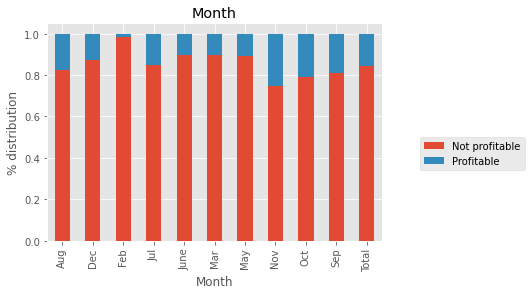

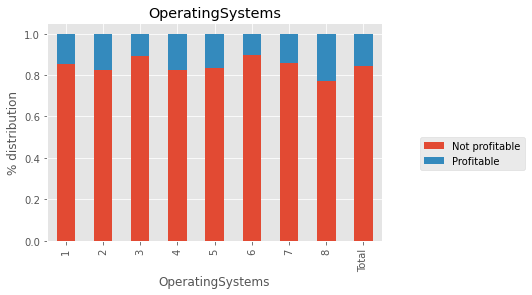

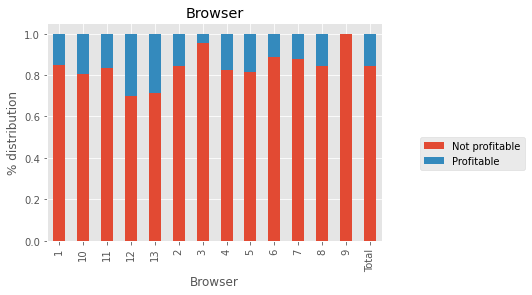

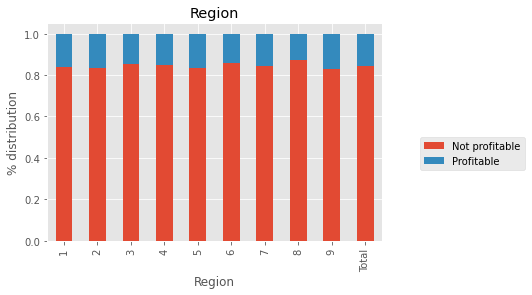

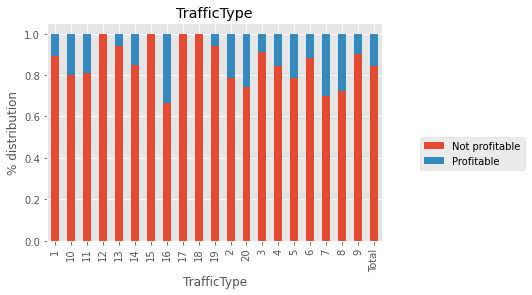

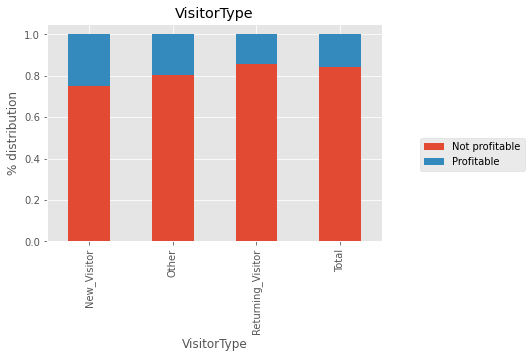

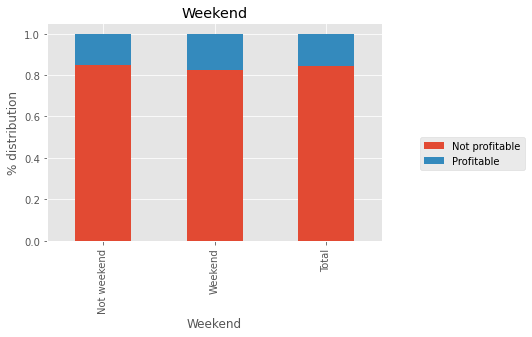

In [21]:
# De la misma manera que antes, generamos un bucle for en el que primero pediremos que se genere la tabla de distribución de frecuencias, y luego que se genere el gráfico stackeado.

for col in categorical:
    if col == "Revenue":
        pass
    else:
        crosstab = pd.crosstab(
            dataset[col],
            dataset["Revenue"],
            margins=True,
            margins_name="Total",
            normalize="index",
        )

        index_list = list(crosstab.index.values)
        profitable = list(crosstab["Profitable"])
        non_profitable = list(crosstab["Not profitable"])

        crosstab.plot(kind="bar", stacked=True)
        plt.ylabel("% distribution")
        plt.xlabel(col)
        plt.title(col)
        plt.legend(bbox_to_anchor=(1.1, 0.5))
        plt.show()

Una vez graficados los resultados, podemos comprobar que, efectivamente, para el caso de Region éstos se distribuyen prácticamente de la misma manera independientemente de la región en la que nos encontremos.
Esto nos permite reducir dimensionalidad a nuestro problema, concluyendo que nuestro problema no es la geografía. Procederemos por tanto a quitar la variable de nuestro dataset

In [22]:
# Eliminamos la variable "Region"

dataset = dataset.drop("Region", axis=1)

Lo siguiente que haremos para continuar con nuestro análisis de las variables será estudiar la correlación de las variables cuantitativas. Para ello, utilizaremos una matriz de correlaciones.

In [23]:
# En primer lugar, generamos un nuevo dataset eliminando las variables cualitativas, de cara a poder graficar con seaborn

dataset_num = dataset.select_dtypes("number")

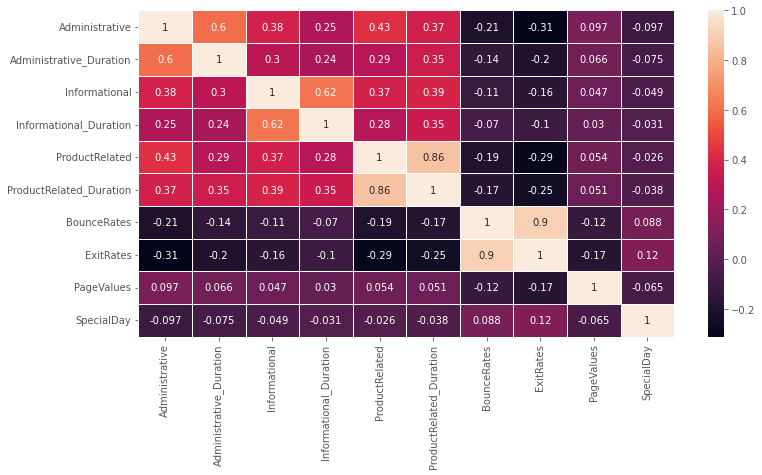

In [24]:
# Posteriormente, aplicamos el gráfico en seaborn

sns.heatmap(
    dataset_num.corr(),
    annot=True,
    annot_kws={"size": 10},
    linewidths=1,
    linecolor="white",
)
plt.gcf().set_size_inches(12, 6)

Esta matriz de correlaciones es **especialmente clave** para el desarrollo del resto del ejercicio. De ella se puede deducir lo siguiente:

* Las variables "XXXX" y "XXXX Duration" tienen elevados coeficientes de correlación entre ellos, lo cual tiene bastante sentido.
* Las variables "Bounce Rate" y "Exit Rate" también tienen una muy elevada correlación.

Esto marcará el desarrollo del resto del ejercicio porque aquí se nos plantean varias alternativas:

1. Eliminar manualmente del dataset aquellas variables muy correlacionadas, con el objetivo de simplificar las predicciones de nuestro modelo
2. Utilizar, de forma previa al algoritmo supervisado de clasificación de clientes, un algoritmo no supervisado de reducción dimensional que sea el que nos agrupe las variables y nos "limpie" el dataset de cara a comenzar con las predicciones.
3. De cara a generar los algoritmos, optar por aquellos que no estén muy influenciados por la existencia de correlación entre las variables.

Dado que estamos aquí para aprender, intentaremos tirar por la segunda vía y, en caso de que no sea posible finalmente, tiraremos por la tercera.

El último paso que daremos para dejar el set de datos preparado será modificar nuestras variables cualitativas a números mediante LabelEncoder y, posteriormente, normalizar la información.

La modificación de las variables podríamos haberla realizado previamente, pero he considerado hacerla en este último paso de cara a ser capaz de entender mejor la información. Al fin y al cabo, sus valores numéricos no representan ningún tipo de valor matemático (ni la media, ni la desviación típica, etc), ni su correlación con el resto de variables puede ser analizada de la misma manera que el resto de variables cuantitativas.

Empezamos con el código:

In [25]:
# En primer lugar, le pedimos que actualice su listado de variables categóricas (recordemos que hemos quitado "Region")
categorical = dataset.select_dtypes("object").columns

# En segundo lugar, transformamos nuestras variables categóricas a numéricas a través de label encoder.
labelencoder = LabelEncoder()

for col in categorical:
    dataset[col] = labelencoder.fit_transform(dataset[col])

dataset.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'TrafficType', 'VisitorType', 'Weekend',
       'Revenue'],
      dtype='object')

In [26]:
# Una vez hemos completado este proceso, pasaremos a la estandarización de las variables, que realizaremos mediante StandardScaler
# En primer lugar, separamos la variable a estimar del resto de variables

x_data = dataset.drop("Revenue", axis=1)
target = dataset["Revenue"]

# En segundo lugar, será utilizar Standard Scaler sobre nuestras variables dependientes

x_standard = StandardScaler().fit_transform(x_data)

Con todos estos pasos dados, ya tendríamos toda la información lista para comenzar a diseñar el algoritmo de ML que utilizaremos.

<b><span style="color:#00bfff;font-family:verdana;font-size:18px"> 2. CONSTRUCCIÓN DEL MODELO PREDICTIVO </span></b>


In [27]:
# En primer lugar, importaremos las librerías que utilizaremos para la construcción de los modelos:

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

De cara a la construcción del modelo predictivo, plantearemos los siguientes steps:

1. Implementación de un modelo de reducción dimensional para optimizar en el modelo las variables con un alto nivel de correlación
2. En base a este nuevo dataset generado, estimación de un modelo predictivo por 3 vías:
    - Modelo lineal
    - Modelo XGBoost
    - Modelo de redes neuronales
3. Evaluación de los modelos

<span style="color:#00bfff;font-family:verdana;font-size:18px"> 2.1 IMPLEMENTANDO EL MODELO DE REDUCCIÓN DIMENSIONAL </span>

Lo primero que haremos para la construcción de este modelo de reducción dimensional es evaluar si nuestros datos son óptimos para llevar a cabo el algoritmo, a través del test de Kaiser - Meyer - Oikin.

In [28]:
# Implementamos el test

kmo_all, kmo_model = calculate_kmo(dataset)

if kmo_model > 0.5:
    print(
        f"El valor de KMO es {round(kmo_model,2)}, y los datos son adecuados para realizar reducción dimensional"
    )
else:
    print(
        f"El valor de KMO es {round(kmo_model,2)}, y los datos NO son adecuados para realizar reducción dimensional"
    )

El valor de KMO es 0.64, y los datos son adecuados para realizar reducción dimensional


In [29]:
# Posteriormente, ajustamos un modelo de análisis factorial a los datos, y le introducimos un número de factores aleatorio, en este caso 5.
fa = FactorAnalyzer(n_factors=5, rotation=None)

fa.fit(dataset)

FactorAnalyzer(n_factors=5, rotation=None, rotation_kwargs={})

In [30]:
# Una vez hecho esto, optimizamos el valor del número de factores a través del criterio Kaiser

ev, v = fa.get_eigenvalues()

print(f"El número de factores adecuado según el criterio de Kaiser es {sum(ev>1)}")

El número de factores adecuado según el criterio de Kaiser es 7


In [31]:
# Con este criterio, generamos el nuevo modelo...

n_factors = 7
fa = FactorAnalyzer(n_factors=n_factors, rotation=None)
fa.fit(dataset)

# Y lo exportamos como un nuevo dataset, que será sobre el que pivotará nuestro modelo supervisado

columnas_factores = []

for i in range(1, n_factors + 1):
    value = f"Factor {i}"
    columnas_factores.append(value)

pd.DataFrame(fa.loadings_, index=dataset.columns, columns=columnas_factores)

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7
Administrative,0.654838,0.085519,0.101358,0.030520,-0.035051,-0.042887,0.529090
Administrative_Duration,0.516643,0.116120,0.104776,0.028256,-0.038697,-0.063604,0.445595
Informational,0.547836,0.271547,0.163821,0.072785,-0.147392,-0.252208,-0.097575
Informational_Duration,0.520031,0.350322,0.225802,0.141638,-0.272718,-0.474627,-0.321456
ProductRelated,0.776173,0.333097,-0.130944,-0.110184,0.152658,0.436333,-0.166806
ProductRelated_Duration,0.724436,0.332022,-0.086344,-0.070662,0.103269,0.288413,-0.140075
BounceRates,-0.520007,0.650393,0.179786,0.243028,0.131773,0.075471,0.099487
ExitRates,-0.645137,0.695042,0.174122,0.226626,0.100870,0.068536,0.068351
PageValues,0.193915,-0.226093,0.025716,0.344574,0.383920,-0.104961,-0.027134
SpecialDay,-0.107303,0.072309,0.005225,0.010661,-0.066741,0.096993,-0.066468


In [32]:
# Posteriormente a generar este modelo, obtenemos las varianzas de los factores

nombres_varianzas = [
    "Varianza del factor",
    "Proporción de varianza",
    "Varianza acumulada",
]
pd.DataFrame(
    fa.get_factor_variance(), columns=columnas_factores, index=nombres_varianzas
)

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7
Varianza del factor,3.237881,1.678984,1.178315,0.957355,0.900723,0.807021,0.676942
Proporción de varianza,0.190464,0.098764,0.069313,0.056315,0.052984,0.047472,0.039820
Varianza acumulada,0.190464,0.289227,0.358540,0.414855,0.467839,0.515311,0.555131


El % de varianza explicado, considerando sólo 7 columnas de las 18 es significativamente alto. No obstante, el nuevo dataset tiene dos principales problemas:

1. El nuevo dataset sólo explica el 50% de la varianza original. Esto, de cara a hacer posteriormente un modelo predictivo, me parece arriesgado.
2. Aparentemente, las cargas del nuevo dataset no parecen tener mucho sentido: hay variables con un alto nivel de carga en diferentes factores y es complicado de entender.

Dadas estas circunstancias, pasamos a generar el algoritmo supervisado normal y corriente.

<span style="color:#00bfff;font-family:verdana;font-size:18px"> 2.2 IMPLEMENTANDO EL MODELO DE APRENDIZAJE SUPERVISADO </span>

<span style="color:#F10646;font-family:verdana;font-size:18px"> 2.2.1 MODELO DE REGRESIÓN LINEAL </span>

Una vez fracasado nuestro intento de realizar el modelo de reducción dimensional como paso previo, generaremos los algoritmos de aprendizaje supervisado de forma normal.

In [33]:
# Empezaremos dividiendo nuestro dataset en datos de prueba y de test, para poder hacer las comprobaciones

X_train, X_test, Y_train, Y_test = train_test_split(
    x_standard, target, test_size=0.2, random_state=0
)

El siguiente paso será implementar los modelos. Empezaremos por el modelo más sencillo, el de regresión lineal:

In [34]:
# En primer lugar, definimos el modelo y los parámetros que queremos testear
# En nuestro caso, testearemos la regularización (C) y el tipo de penalización (class_weight)

modelo = LogisticRegression()
parametros = {
    "C": [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09],
    "class_weight": ["balanced", None],
}

In [35]:
# Posteriormente, hallamos su óptimo a través de GridSearchCV

modelo_gs = GridSearchCV(
    modelo, param_grid=parametros, cv=5, scoring="roc_auc"
)  # le indicamos al modelo que para hacer la validación cruzada considere 5 bucket de datos (cv=5), y que escoja el modelo que más optimice la curva ROC

modelo_gs.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07,
                               0.08, 0.09],
                         'class_weight': ['balanced', None]},
             scoring='roc_auc')

In [36]:
# Acto seguido, le preguntamos al modelo cuáles son los parámetros
# También le preguntaremos al modelo qué ROC ha obtenido con la ejecución

print(
    f"Los parámetros utilizados para la ejecución del modelo son \n {modelo_gs.best_params_.values()}"
)

print(f"\nEl ROC obtenido con estos parámetros es de {round(modelo_gs.best_score_,2)}")

Los parámetros utilizados para la ejecución del modelo son 
 dict_values([0.09, 'balanced'])

El ROC obtenido con estos parámetros es de 0.89


Los parámetros elegidos finalmente son C=0.09 y Class Weight="Balanceado. Con estos datos, vamos a generar nuestro modelo definitivo

In [37]:
# En primer lugar, generamos el modelo...

modelo = LogisticRegression(
    C=modelo_gs.best_params_["C"], class_weight=modelo_gs.best_params_["class_weight"]
)

# Y lo entrenamos para que sea capaz de predecir

print("Entrenando modelo...")
modelo.fit(X_train, Y_train)
print("Modelo entrenado!")

Entrenando modelo...
Modelo entrenado!


In [38]:
# Lo siguiente que haremos será testear nuestro modelo. Para ello, haremos uso de los datos de test que hemos spliteado previamente

y_test_pred_prob = modelo.predict_proba(X_test)

In [39]:
# Para saber si nuestro modelo es bueno o malo, umbralizaremos las predicciones.
# Como umbral, utilizaremos el valor de AUC obtenido en nuestro modelo, y evaluaremos los resultados

umbral = modelo_gs.best_score_

# Acto seguido, calculamos cuál es el valor definitivo de la clasificación en función del umbral

y_umbralizadas = 1 * (y_test_pred_prob[:, 1] > umbral)

# Con estos datos, generamos la matriz de confusión y las principales métricas

print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, y_umbralizadas))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, y_umbralizadas), 2)))
print("Sensitividad\t{}".format(round(metrics.recall_score(Y_test, y_umbralizadas), 2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, y_umbralizadas), 2)))

Matriz de confusión
 [[1984   54]
 [ 233  169]]

Accuracy	0.88
Sensitividad	0.42
Precisión	0.76


In [40]:
# Como último paso, incorporamos toda esta información en un diccionario que utilizaremos posteriormente para comparar entre los diferentes modelos

model_data = {}
model_data["Linear Regression"] = [
    round(metrics.accuracy_score(Y_test, y_umbralizadas), 2),
    round(metrics.recall_score(Y_test, y_umbralizadas), 2),
    round(metrics.precision_score(Y_test, y_umbralizadas), 2),
    round(modelo_gs.best_score_, 2),
]

<span style="color:#F10646;font-family:verdana;font-size:18px"> 2.2.2 MODELO XGBOOST </span>

El algoritmo elegido como segunda opción para realizar este problema es el XGBoost.

Los motivos para haberlo elegido son los siguientes:

* Según los apuntes, siempre debe ser una de las primeras opciones a valorar a la hora de construir un modelo de clasificación o regresión
* No necesitamos explicabilidad en el modelo, por lo que es viable utilizarlo
* Según lo visto anteriormente, nuestro modelo posee un gran número de valores atípicos, y este los tiene correctamente en cuenta.
* La proporción de clientes profitable vs non - profitable es considerablemente desbalanceada, y este modelo, al tener más en cuenta los errores, se adapta muy bien a datasets con clases desbalanceadas.

Dicho esto, comenzamos con el código

In [41]:
# De la misma manera que antes, empezaremos dividiendo nuestro dataset en datos de prueba y de test, para poder hacer las comprobaciones

X_train, X_test, Y_train, Y_test = train_test_split(
    x_standard, target, test_size=0.2, random_state=0
)
dtrain = xgb.DMatrix(data=X_train, label=Y_train)
dtest = xgb.DMatrix(data=X_test, label=Y_test)

In [42]:
# Acto seguido, optimizaremos los hiperparámetros del modelo a través de GridSearchCV...

parametros = {
    "max_depth": range(1, 11),
    "eta": list(np.arange(0, 1, 0.2)),
    "subsample": list(np.arange(0, 1, 0.2)),
    "lambda": list(np.arange(0, 1, 0.2)),
}

model_xg = xgb.XGBClassifier()
model_xg_opt = GridSearchCV(model_xg, parametros, cv=3, scoring="roc_auc")
print("Entrenando modelo...")
model_xg_opt.fit(X_train, Y_train)
print("Modelo entrenado y parámetros calculados!")

Entrenando modelo...
Modelo entrenado y parámetros calculados!


In [43]:
# Y obtenemos sus valores

print(
    f"Los parámetros utilizados para la ejecución del modelo son \n {model_xg_opt.best_params_.values()}"
)

print(
    f"\nEl ROC obtenido con estos parámetros es de {round(model_xg_opt.best_score_,2)}"
)

Los parámetros utilizados para la ejecución del modelo son 
 dict_values([0.2, 0.4, 3, 0.8])

El ROC obtenido con estos parámetros es de 0.93


In [44]:
# Una vez obtenidos éstos, generamos el modelo

param_xg = {
    "eta": 0.2,
    "lambda": 0.4,
    "max_depth": 3,
    "subsample": 0.8,
}

n_round = 200

print("Entrenando modelo...")
model_xg = xgb.train(param_xg, dtrain)
print("Modelo entrenado!")

Entrenando modelo...
Modelo entrenado!


In [45]:
# Lo siguiente que haremos será testear nuestro modelo. Para ello, haremos uso de los datos de test que hemos spliteado previamente

pred_train = model_xg.predict(dtrain)
pred_test = model_xg.predict(dtest)

In [46]:
# Lo siguiente que haremos será umbralizar nuestros resultados. Para ser homogéneos con el anterior modelo, utilizaremos un umbral de 0.6
# De nuevo, utilizamos los resultados utilizndo el valor que maximiza el área bajo la curva ROC

umbral = model_xg_opt.best_score_

# Una vez hecho esto, modificamos nuestro array de valores predichos para generar la matriz de confusión y las principales métricas

pred_test[pred_test > umbral] = int(1)  # Cambiamos nuestros 1 y 0 al umbral...
pred_test[pred_test <= umbral] = int(0)
pred_test = pred_test.astype(
    "int"
)  # Y modificamos el formato del array para que no se genere conflicto entre floats e integers

# Por último, generamos las principales métricas del modelo

print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, pred_test))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, pred_test), 2)))
print("Sensitividad\t{}".format(round(metrics.recall_score(Y_test, pred_test), 2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, pred_test), 2)))

Matriz de confusión
 [[2038    0]
 [ 402    0]]

Accuracy	0.84
Sensitividad	0.0
Precisión	0.0


In [47]:
# Como último paso, incorporamos toda esta información en un diccionario que utilizaremos posteriormente para comparar entre los diferentes modelos

model_data["XGBoost"] = [
    round(metrics.accuracy_score(Y_test, pred_test), 2),
    round(metrics.recall_score(Y_test, pred_test), 2),
    round(metrics.precision_score(Y_test, pred_test), 2),
    round(model_xg_opt.best_score_, 2),
]

<span style="color:#F10646;font-family:verdana;font-size:18px"> 2.2.3 MODELO DE REDES NEURONALES </span>

El último algoritmo que testearemos para resolver este problema de clasificación será el de redes neuronales. Para ello, utilizaremos keras según lo aprendido en el módulo y evaluaremos si su utilización es realmente mucho mejor en este caso que los otros dos modelos testeados

In [48]:
# De la misma manera que antes, empezaremos dividiendo nuestro dataset en datos de prueba y de test, para poder hacer las comprobaciones

X_train, X_test, Y_train, Y_test = train_test_split(
    x_standard, target, test_size=0.2, random_state=0
)

In [49]:
# Acto seguido, definimos nuestro modelo de red neuronal
# Lo primero que haremos será definir cuántas neuronas de entrada tiene nuestra red. Estas serán igual a la longitud de nuestro dataset, eliminando la variable explicada "Revenue"

input_layer = len(dataset.drop("Revenue", axis=1).columns)

# Acto seguido, definimos las dimensiones de nuestra red

modelo_nn = keras.Sequential()
modelo_nn.add(keras.layers.Dense(64, input_dim=input_layer, activation="relu"))
modelo_nn.add(keras.layers.Dense(64, activation="relu"))
modelo_nn.add(keras.layers.Dense(1, activation="sigmoid"))

In [50]:
# Lo siguiente que haremos será compilar nuestro modelo

modelo_nn.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[keras.metrics.AUC(curve="ROC")], # Dado que queremos minimizar nuestra curva ROC, le diremos al modelo que esa es nuestra principal métrica
)

In [56]:
# Ahora, mediante GridSearchCV trataremos de escoger cuál será el mejor "Optimizer".
#Generamos un diccionario con las alternativas

neurons = [8, 16, 32, 64, 128]
param_grid = dict(model__neurons=neurons)

# Y optimizamos este valor mediante GridSearchCV

grid = GridSearchCV(estimator=modelo_nn, param_grid=param_grid, n_jobs=-1, cv=3)

print("Entrenando modelo...")
grid.fit(X_train, Y_train)
print("Modelo entrenado y parámetros calculados!")

Entrenando modelo...


TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <keras.engine.sequential.Sequential object at 0x0000014FDA644940> does not.

In [ ]:
# Posteriormente, trataremos de entrenar nuestro modelo
# En primer lugar, le diremos que nos muestre un punto a medida que vaya avanzando en el entrenamiento

class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print("")
        print(".", end="")

# Por otro lado, le decimos que tendrá que hacer un early stop del modelo cuando el AUC (area under the curve) de la curva ROC vaya empeorando

early_stop = keras.callbacks.EarlyStopping(monitor="auc", patience=10)

# Ahora sí, entrenamos el modelo el modelo

print("Entrenando modelo...")

history = modelo_nn.fit(
    X_train,
    Y_train,
    epochs=500,
    batch_size=10,
    verbose=False,
    callbacks=[early_stop, PrintDot()],
)

print("Modelo entrenado!")

In [ ]:
print(
    f"El AUC value de nuestro modelo tras el entrenamiento es {round(history.history['auc'][-1],5)}"
)

In [ ]:
# Una vez entrenado nuestro modelo, predigamos ahora nuestro test dataset para generar las principales métricas

pred_nn = modelo_nn.predict(X_test)

In [ ]:
# Una vez hecho esto, modificamos nuestro array de valores predichos para generar la matriz de confusión y las principales métricas
# De nuevo, utilizamos los resultados utilizndo el valor que maximiza el área bajo la curva ROC

umbral = history.history['auc'][-1]

pred_nn[pred_nn > umbral] = int(1)  # Cambiamos nuestros 1 y 0 al umbral...
pred_nn[pred_nn <= umbral] = int(0)
pred_nn = pred_nn.astype("int")

# Por último, generamos las principales métricas del modelo

print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, pred_nn))
print("\nAccuracy\t{}".format(round(metrics.accuracy_score(Y_test, pred_nn), 2)))
print("Sensitividad\t{}".format(round(metrics.recall_score(Y_test, pred_nn), 2)))
print(u"Precisión\t{}".format(round(metrics.precision_score(Y_test, pred_nn), 2)))

In [ ]:
# Como último paso, incorporamos toda esta información en un diccionario que utilizaremos posteriormente para comparar entre los diferentes modelos

model_data["Neural network"] = [
    round(metrics.accuracy_score(Y_test, pred_nn), 2),
    round(metrics.recall_score(Y_test, pred_nn), 2),
    round(metrics.precision_score(Y_test, pred_nn), 2),
    round(history.history["auc"][-1], 5),
]

<span style="color:#00bfff;font-family:verdana;font-size:18px"> 2.3 EVALUACIÓN DE LOS RESULTADOS </span>

Una vez que hemos realizado los 3 modelos, vamos a evaluar qué resultados hemos obtenido para cada uno y cuál sería el que propondríamos a la empresa implementar. Aunque el enunciado dice que propongamos el que maximice el AUC, trataremos de ver si tendría sentido proponer algún otro.

In [ ]:
# Para ello, realizaremos algunos tratamientos sobre el diccionario de datos donde hemos almcaenado la información de cara a convertirla en DataFrame

model_dataframe = pd.DataFrame(model_data).transpose()
model_dataframe = model_dataframe.rename(
    columns={0: "Accuracy", 1: "Recall", 2: "Precission", 3: "AUC"}
)
model_dataframe = model_dataframe.reset_index()
model_dataframe = model_dataframe.rename(columns={"index": "Model"})

In [ ]:
model_dataframe

El enunciado nos pide que nos quedemos con aquel valor que maximice la curva ROC, es decir, con un mayor valor AUC ("Area under the curve").

Graficaremos los resultados y veremos cuál deberá ser el escogido:

In [ ]:
# Acto seguido, definiremos el gráfico

model_dataframe.plot(x="Model",y=["Accuracy","Recall","Precission","AUC"],kind="bar",edgecolor="white",figsize=(15,10))
plt.style.use("ggplot")
plt.legend(facecolor="white")
plt.xticks(rotation=360)
plt.show()

Lo que nos indican los resultados, como en principio era previsible, es que la implementación de una red neuronal da lugar a una predicción binomial casi perfecta (valor AUC 0,99608), por lo que éste debería ser el modelo a implementar.